In [1]:
import networkx as nx
from functools import reduce
import operator 
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

part 4

In [2]:
G = nx.Graph()
G.add_edge(1, 2)

In [3]:
ii=0
for ii in range(0,100):
    all_nodelinks = reduce(operator.concat, G.edges)
    rand_item = all_nodelinks[random.randrange(len(all_nodelinks))]
    G.add_edge(ii ,rand_item)

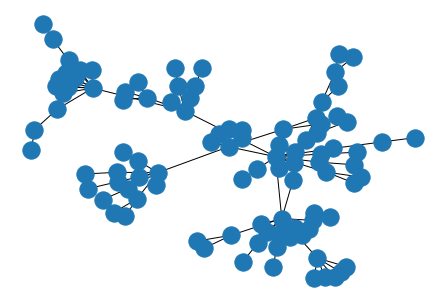

In [4]:
nx.draw(G)

In [5]:
G2 = nx.Graph()
G2.add_edge(1, 2)

In [6]:
ii=0
for ii in range(0,5000):
    all_nodelinks = reduce(operator.concat, G2.edges)
    rand_item = all_nodelinks[random.randrange(len(all_nodelinks))]
    G2.add_edge(ii ,rand_item)

In [14]:
degree=dict(G2.degree())

In [16]:
max(degree.values())

96

In [17]:
min(degree.values())

1

(0, 4000)

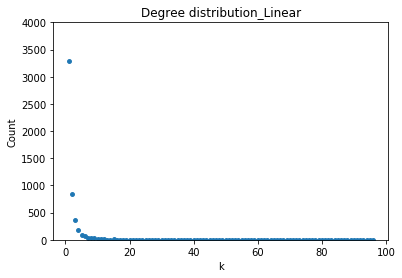

In [18]:
degree = np.array(list(dict(G2.degree).values()))
v = np.arange(degree.min(), degree.max()+2) 
hist, bin_edges = np.histogram(degree, bins = v - 1/2)   #set the x-axis as how many differnet counts it has#
plt.scatter(v[:-1], hist, s = 15)
plt.ylabel('Count')
plt.xlabel('k')
plt.title("Degree distribution_Linear")
plt.ylim((0, 4000))  

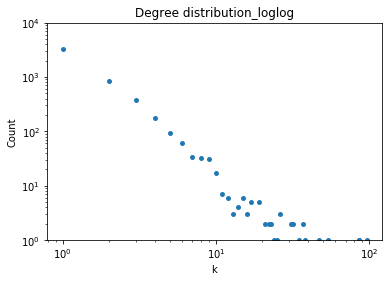

In [19]:
degree = np.array(list(dict(G2.degree).values()))
v = np.arange(degree.min(), degree.max()+2) 
hist, bin_edges = np.histogram(degree, bins = v - 1/2)   #set the x-axis as how many differnet counts it has#
plt.scatter(v[:-1], hist, s = 15)
plt.ylabel('Count')
plt.xlabel('k')
plt.title("Degree distribution_loglog")
plt.ylim([10**0,10**4])
plt.xscale('log')
plt.yscale('log')

part 5

In [106]:
nodes=list(nx.connected_components(G2))

In [110]:
nodes=list(nodes[0])

In [117]:
randomnode=random.choice(nodes)

In [118]:
G2.degree[randomnode]

4

In [128]:
list(G2.adj[randomnode])

[273, 1512, 1632, 2334]

In [134]:
list(G2.adj[randomnode])

[273, 1512, 1632, 2334]

In [135]:
neighbors=list(G2.adj[randomnode])

In [138]:
neighbors_degree_list=list(G2.degree[i] for i in neighbors)
print("Average degree of this neighbor-group:",sum(neighbors_degree_list)/len(neighbors_degree_list))

Average degree of this neighbor-group: 5.0


In [139]:
if sum(neighbors_degree_list)/len(neighbors_degree_list)>G2.degree[randomnode]:
    print("That's true for Friendship paradox")
else:
    print("That's not true for Friendship paradox")

That's true for Friendship paradox


In [156]:
ii=0
true_count=0
for ii in range(0,1000):
    randomnode=random.choice(nodes)
    neighbors=list(G2.adj[randomnode])
    neighbors_degree_list=list(G2.degree[i] for i in neighbors)
    if sum(neighbors_degree_list)/len(neighbors_degree_list)>G2.degree[randomnode]:
        true_count+=1

print("the possibility of Friendship Paradox being true in this case:","{:.2%}".format(true_count/1000))

the possibility of Friendship Paradox being true in this case: 85.10%


According to the formular of the averaged degree, we could use calculate p by using p=k/(N-1)

In [177]:
N=5000
p=(sum(neighbors_degree_list)/len(neighbors_degree_list))/(5000-1)

In [178]:
R=nx.erdos_renyi_graph(N,p)

In [179]:
degree=dict(R.degree())

Text(0.5, 1.0, 'ER Model_degree distribution_Linear')

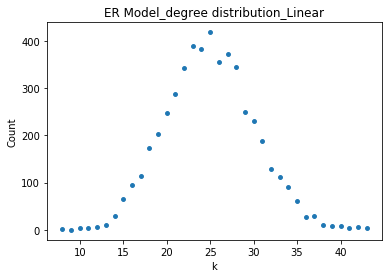

In [180]:
degree = np.array(list(dict(R.degree).values()))
v = np.arange(degree.min(), degree.max()+2) 
hist, bin_edges = np.histogram(degree, bins = v - 1/2)   #set the x-axis as how many differnet counts it has#
plt.scatter(v[:-1], hist,s = 15)
plt.ylabel('Count')
plt.xlabel('k')
plt.title("ER Model_degree distribution_Linear")
# plt.ylim((0, 100))  

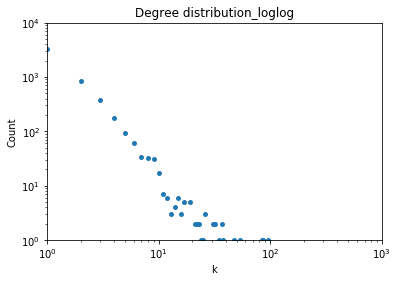

In [181]:
degree = np.array(list(dict(G2.degree).values()))
v = np.arange(degree.min(), degree.max()+2) 
hist, bin_edges = np.histogram(degree, bins = v - 1/2)   #set the x-axis as how many differnet counts it has#
plt.scatter(v[:-1], hist, s = 15)
plt.ylabel('Count')
plt.xlabel('k')
plt.title("Degree distribution_loglog")
plt.ylim([10**0,10**4])
plt.xlim([10**0,10**3])
plt.xscale('log')
plt.yscale('log')


In [182]:
print("The number of connected components in ER model:",len(list(nx.connected_components(R))[0]))
print("The number of connected components in BA model:",len(list(nx.connected_components(G2))[0]))

The number of connected components in ER model: 5000
The number of connected components in BA model: 5000


__Differences analysis:__
1)Shown in degreee distributions, ER model is more like a normal distrubution. Compared in BA model that few nodes have extreme high degree and most of others have very low degree, nodes in ER model are more average. 